In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

# Loading and Exploring the Data

In [55]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [56]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


label: 7


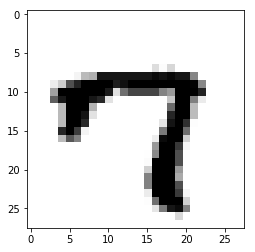

In [57]:
#plot i-th digit
i=6666
print("label:",y_train[i])
plt.imshow(x_train[i],cmap='Greys')

In [58]:
height,width,depth = 28,28,1 # mnist image size
num_classes=10 # digits 0..9

num_train = len(x_train)
num_test = len(x_test)

#converting the data
X_train=x_train.reshape(num_train, height * width) # reshape to one dimension (flatten)
X_test=x_test.reshape(num_test,height*width)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255 # normalisation to 0..1
X_test/=255

#converting to categorical 
Y_train=utils.to_categorical(y_train,num_classes) # 4 -> [0,0,0,1,0,0,0,0,0]
Y_test=utils.to_categorical(y_test,num_classes)

In [59]:
print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000, 10)


## Perceptron - 1 layer neural network

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
perceptron=Sequential()
perceptron.add(Dense(input_shape=(height*width,),
                     units=num_classes,
                    activation="softmax"))

perceptron.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [62]:
perceptron.fit(X_train, Y_train,
          batch_size=512,
          epochs=20,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 44us/step - loss: 1.1918 - acc: 0.7009 - val_loss: 0.6164 - val_acc: 0.8728
Epoch 2/20
54000/54000 [==============================] - 1s 18us/step - loss: 0.5830 - acc: 0.8608 - val_loss: 0.4287 - val_acc: 0.9015
Epoch 3/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.4643 - acc: 0.8810 - val_loss: 0.3620 - val_acc: 0.9090
Epoch 4/20
54000/54000 [==============================] - 1s 18us/step - loss: 0.4101 - acc: 0.8921 - val_loss: 0.3260 - val_acc: 0.9160
Epoch 5/20
54000/54000 [==============================] - 1s 19us/step - loss: 0.3781 - acc: 0.8993 - val_loss: 0.3034 - val_acc: 0.9203
Epoch 6/20
54000/54000 [==============================] - 1s 18us/step - loss: 0.3565 - acc: 0.9043 - val_loss: 0.2892 - val_acc: 0.9222
Epoch 7/20
54000/54000 [==============================] - 1s 18us/step - loss: 0.3410 - acc: 0.9076 - val_loss: 0.2770 - val_acc:

In [63]:
#Evaluation
score = perceptron.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2717032761156559
Test accuracy: 0.9249


In [64]:
#Errors
def show_errors(model):
    import random
    ans = model.predict(X_test)
    errors=[int(i) for i in range(num_test) if ans.argmax(axis=1)[i]!=y_test[i]]
    sample_size=16
    samples = random.sample(errors,sample_size)
    fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15, 15))
    for s,i in zip(samples,list(range(sample_size))):   
        axes[i%4,i//4].imshow(x_test[s],cmap='Greys')
        axes[i%4,i//4].set_title("#%d, Prediction: %d, Original: %d"%(s, ans.argmax(axis=1)[s],y_test[s]))
        axes[i%4,i//4].set_axis_off()
    #print ("Errors: %d of %d"%(len(errors),len(X_test)))    
    plt.show()

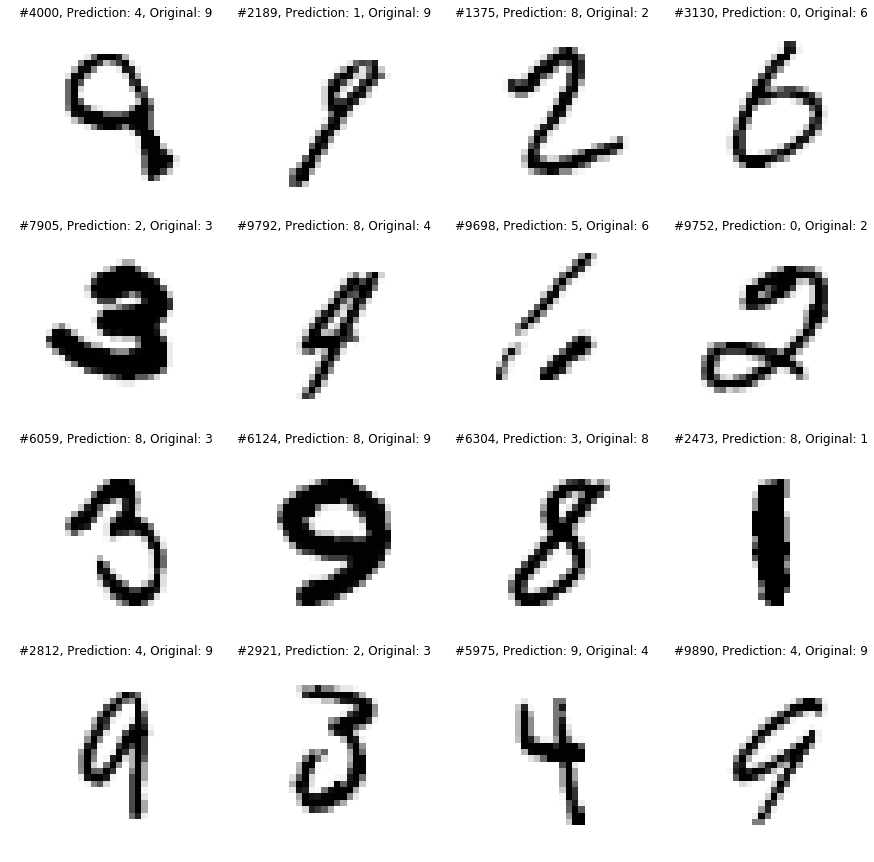

In [65]:
show_errors(perceptron)

## Multi-Layer Perceptron. Just add more layers

In [66]:
mlp=Sequential()
mlp.add(Dense(input_shape=(height*width,),
                     units=1024,
                    activation="relu"))
mlp.add(Dense(units=1024,activation="relu"))
mlp.add(Dense(units=10,activation="softmax"))


mlp.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [67]:
mlp.fit(X_train, Y_train,
          batch_size=512,
          epochs=20,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 113us/step - loss: 0.3052 - acc: 0.9109 - val_loss: 0.1127 - val_acc: 0.9687
Epoch 2/20
54000/54000 [==============================] - 5s 95us/step - loss: 0.0948 - acc: 0.9703 - val_loss: 0.0761 - val_acc: 0.9768
Epoch 3/20
54000/54000 [==============================] - 5s 94us/step - loss: 0.0546 - acc: 0.9832 - val_loss: 0.0691 - val_acc: 0.9783
Epoch 4/20
54000/54000 [==============================] - 5s 95us/step - loss: 0.0345 - acc: 0.9897 - val_loss: 0.0661 - val_acc: 0.9798
Epoch 5/20
54000/54000 [==============================] - 5s 97us/step - loss: 0.0211 - acc: 0.9938 - val_loss: 0.0629 - val_acc: 0.9822
Epoch 6/20
54000/54000 [==============================] - 5s 97us/step - loss: 0.0162 - acc: 0.9953 - val_loss: 0.0774 - val_acc: 0.9800
Epoch 7/20
54000/54000 [==============================] - 5s 96us/step - loss: 0.0110 - acc: 0.9969 - val_loss: 0.0671 - val_acc

In [68]:
score = mlp.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08533104843118704
Test accuracy: 0.9813


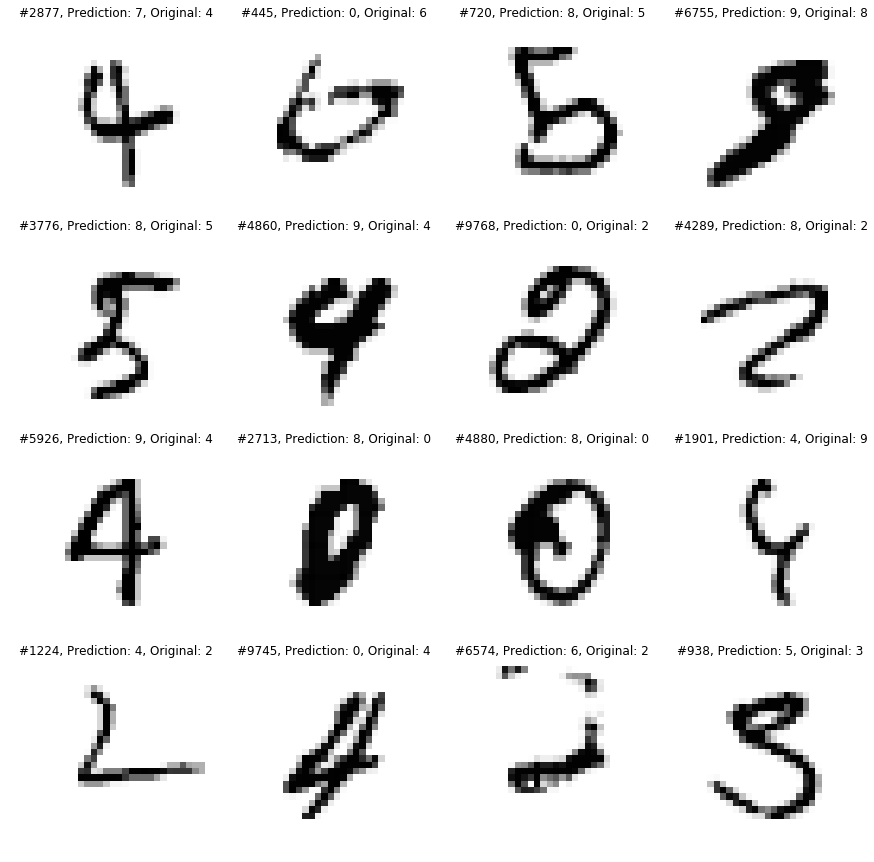

In [69]:
#Errors
show_errors(mlp)

## Convolitional Neural Network

In [71]:
#CNN Imports
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, MaxPooling1D

In [95]:
conv=Sequential()
conv.add(Convolution2D(input_shape=(28,28,1),
                       filters=32,
                      kernel_size=(3,3),
                      activation='relu'))

conv.add(Convolution2D(filters=32,
                      kernel_size=(3,3),
                      activation='relu'))

conv.add(MaxPooling2D(pool_size=(2,2)))
'''
conv.add(Convolution2D(filters=64,
                      kernel_size=(3,3),
                      activation='relu'))

conv.add(Convolution2D(filters=64,
                      kernel_size=(3,3),
                      activation='relu'))

conv.add(MaxPooling2D(pool_size=(2,2)))
'''
conv.add(Dropout(0.5))
conv.add(Flatten())
conv.add(Dense(1024, activation='relu'))
#conv.add(Dense(512, activation='relu'))
conv.add(Dropout(0.25))
conv.add(Dense(num_classes, activation='softmax'))

conv.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 64)          0         
__________

In [96]:
X_train = x_train.reshape(x_train.shape[0], height, width, 1)
X_test = x_test.reshape(x_test.shape[0], height, width, 1)

In [97]:
conv.fit(X_train, Y_train,
          batch_size=512,
          epochs=10,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 36s 674us/step - loss: 1.6386 - acc: 0.6744 - val_loss: 0.0927 - val_acc: 0.9723
Epoch 2/10
54000/54000 [==============================] - 33s 612us/step - loss: 0.1582 - acc: 0.9516 - val_loss: 0.0455 - val_acc: 0.9860
Epoch 3/10
54000/54000 [==============================] - 33s 613us/step - loss: 0.0993 - acc: 0.9685 - val_loss: 0.0426 - val_acc: 0.9860
Epoch 4/10
54000/54000 [==============================] - 33s 614us/step - loss: 0.0798 - acc: 0.9756 - val_loss: 0.0314 - val_acc: 0.9898
Epoch 5/10
54000/54000 [==============================] - 33s 613us/step - loss: 0.0617 - acc: 0.9808 - val_loss: 0.0325 - val_acc: 0.9910
Epoch 6/10
54000/54000 [==============================] - 34s 620us/step - loss: 0.0551 - acc: 0.9820 - val_loss: 0.0249 - val_acc: 0.9923
Epoch 7/10
54000/54000 [==============================] - 33s 618us/step - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0

In [98]:
score = conv.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024426371574035873
Test accuracy: 0.9921


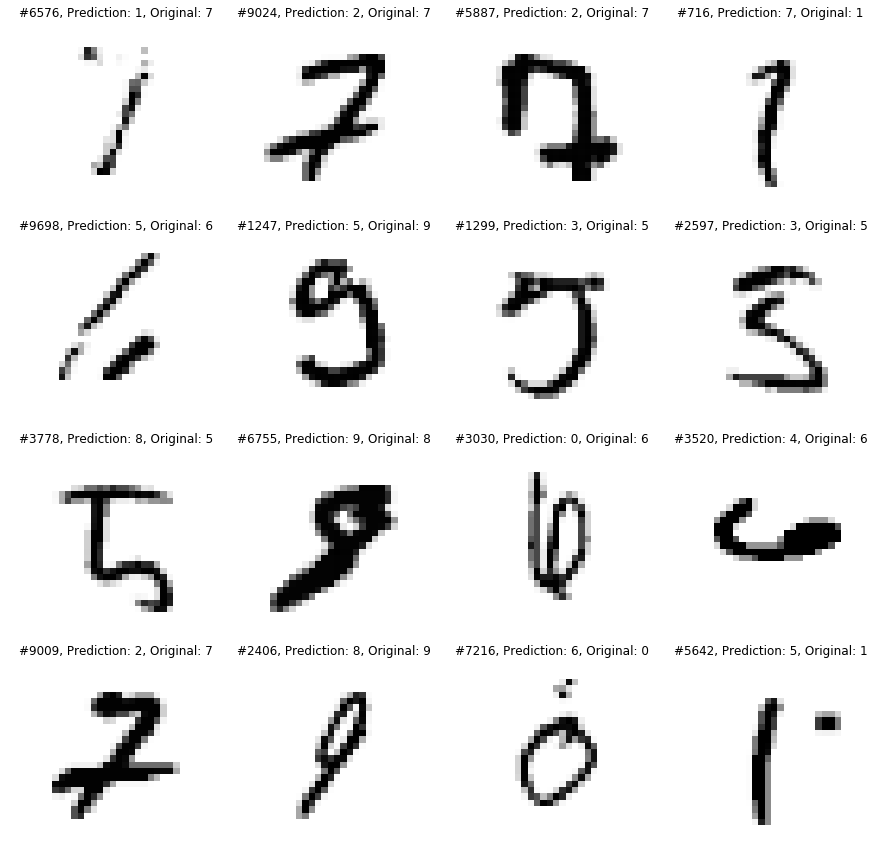

In [94]:
show_errors(conv)